In [23]:
import Topyfic
import pandas as pd

k_topics = [5, 10, 13, 14, 15, 20, 25, 30, 35, 40, 45, 50]

## number of topics

In [26]:
df = pd.DataFrame(columns=['k', 'N'])

for k in k_topics:
    print(k)
    name = f"{k}/topmodel/topModel_sn_ModelAD_ENCODE_regulatory_genes_control_rep1_{k}.p"
    #print(name)
    top_model = Topyfic.read_topModel(name)
    
    tmp = pd.DataFrame([[k, top_model.N]], columns=['k', 'N'])
    df = pd.concat([df, tmp])
df

5
Reading TopModel done!
10
Reading TopModel done!
13
Reading TopModel done!
14
Reading TopModel done!
15
Reading TopModel done!
20
Reading TopModel done!
25
Reading TopModel done!
30
Reading TopModel done!
35
Reading TopModel done!
40
Reading TopModel done!
45
Reading TopModel done!
50
Reading TopModel done!


,k,N
0,5,10
0,10,13
0,13,14
0,14,13
0,15,15
0,20,15
0,25,14
0,30,15
0,35,13
0,40,15


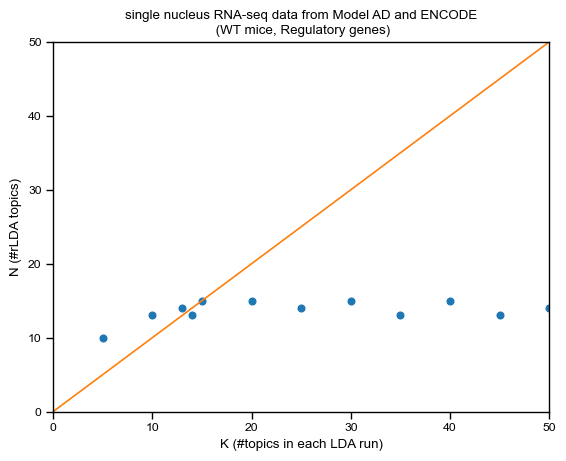

In [27]:
#from scipy.interpolate import interp1d
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42

x = df['k'].tolist()
y = df['N'].tolist()

plt.plot(x, y, 'o')
#plt.plot(xnew, f_linear(xnew), '-', label='linear')
    
plt.plot([0] + k_topics, [0] + k_topics, linestyle='solid')    
#plt.axvline(x=10, color="red", linestyle="solid", label='k=10')
plt.xlabel('K (#topics in each LDA run)')
plt.ylabel('N (#rLDA topics)')
plt.ylim([0,50])
plt.xlim([0,50])
plt.title('single nucleus RNA-seq data from Model AD and ENCODE\n (WT mice, Regulatory genes)')
#plt.legend(loc='best')
plt.savefig(f'k_n.pdf')

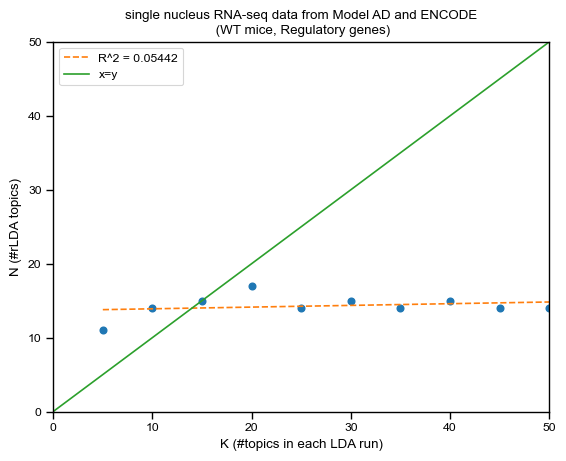

In [18]:
#from scipy.interpolate import interp1d
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42

x = df['k'].tolist()
y = df['N'].tolist()

plt.plot(x, y, 'o')
    
# Define interpolators.
x = df['k'].values.reshape(-1, 1)
y = df['N'].values.reshape(-1, 1)
model = LinearRegression()
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)

x_pred = np.linspace(5, 50, num=41, endpoint=True)
y_pred = model.predict(x_pred.reshape(-1, 1))
plt.plot(x_pred, y_pred, 
             linestyle='dashed', 
             label=fr'R^2 = {round(r_sq, 5)}')

    
plt.plot([0] + k_topics, [0] + k_topics, linestyle='solid', label='x=y')    
#plt.axvline(x=10, color="red", linestyle="solid", label='k=10')
plt.xlabel('K (#topics in each LDA run)')
plt.ylabel('N (#rLDA topics)')
plt.ylim([0,50])
plt.xlim([0,50])
plt.title('single nucleus RNA-seq data from Model AD and ENCODE\n (WT mice, Regulatory genes)')
plt.legend(loc='best')
plt.savefig(f'k_n_prediction_half.pdf')

In [22]:
model.predict(np.array([15]).reshape(-1, 1))
#x_pred, y_pred

array([[14.01212121]])